In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

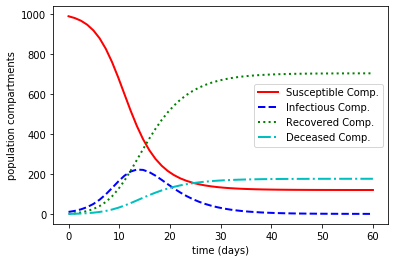

In [8]:

############################################################################################
#STEP 1: definition of the dynamical system 

def SIRD(z, t, b, m, d):
    S = z[0] # Susceptible compartment
    I = z[1] # Infectious compartment
    R = z[2] # Recovered compartment
    D = z[3] # Deceased compartment
    
    dSdt = -b * S * (I/N)
    dIdt =  b * S * (I/N) - m * I - d * I
    dRdt =                  m * I
    dDdt =                          d * I
    
    return [dSdt, dIdt, dRdt, dDdt]
############################################################################################



############################################################################################
#STEP 2: set initial conditions
z0 = [990, 10, 0, 0] # starting off with 990 healthy  and 10 infected people.
N = z0[0] + z0[1] + z0[2] # oi deceased de logizontai sto overall population.
############################################################################################



############################################################################################
#STEP 3: define time-points
t = np.linspace(0,60)
############################################################################################


############################################################################################
# STEP 4: assign values to parameters
b = 0.6 # infection rate (1/day)
m = 0.2   # recovery rate(1/day)
d = 0.05  # death rate(1/day)
############################################################################################




###########################################################################################
#STEP 5:solve SIRD model (solver: odeint)

# solve the dynamical system
z = odeint(SIRD, z0, t, args = (b, m, d))

# assign the components to corresponding compartments
S = z[:,0]
I = z[:,1]
R = z[:,2]
D = z[:,3]

############################################################################################




############################################################################################
#STEP 6:plot results
plt.plot(t, S, 'r-', linewidth = 2, label = 'Susceptible Comp.')
plt.plot(t, I, 'b--', linewidth = 2, label = 'Infectious Comp.')
plt.plot(t, R, 'g:', linewidth = 2, label = 'Recovered Comp.')
plt.plot(t, D, 'c-.', linewidth = 2, label = 'Deceased Comp.')

plt.xlabel('time (days)')
plt.ylabel('population compartments')
plt.legend(loc='best')
plt.show()
############################################################################################